In [166]:
import random
from matplotlib import pyplot as plt
import math

In [152]:
def integrate1D(f, lims, num_points=100):
    sum = 0
    for i in range(num_points):
        x = random.uniform(lims[0], lims[1])
        sum += f(x) * (lims[1] - lims[0])
    return sum / num_points

In [153]:
def integrate2D(f, xlims, ylims, num_points=100):
    sum = 0
    for i in range(num_points):
        x = random.uniform(xlims[0], xlims[1])
        y = random.uniform(ylims[0], ylims[1])
        sum += f(x,y) * (xlims[1] - xlims[0]) * (ylims[1] - ylims[0])
    return sum / num_points

In [185]:
def f1(x,y):
    return 3*x*x

def f2(x,y):
    return x*x*y

def integrate_vs_points(f, xlims=[0,1], ylims=[0,1], max_points=1000, plotname='default.png'):
    X = [i for i in range(1,max_points)]
    Y = []
    for num_points in X:
        Y.append(integrate2D(f, xlims, ylims, num_points))

    fig = plt.figure()
    plt.xlabel("Number of points")
    plt.ylabel("Integral")
    plt.plot(X, Y)
    plt.savefig(plotname)


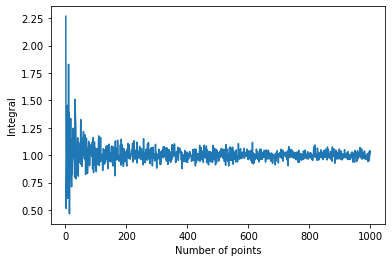

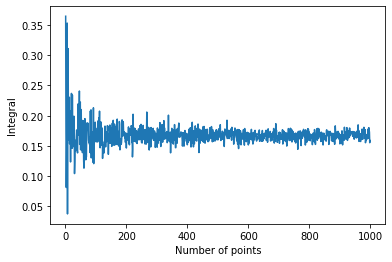

In [186]:
integrate_vs_points(f1, [0,1], plotname="3x_square.png")
integrate_vs_points(f2, [0,1], [0,1], plotname="x_square_y.png")

In [199]:
def stddev(num_points, f, xlims=[0,1], ylims=[0,1], num_trials=100, plot=False, plotname="default.png"):
    sum = 0
    square_sum = 0
    X = []
    Y = []
    for i in range(num_trials):
        integral = integrate2D(f, xlims, ylims, num_points)
        X.append(i)
        Y.append(integral)
        sum += integral
        square_sum += integral*integral
    
    if plot:
        plt.figure()
        plt.xlabel("trial")
        plt.ylabel("interal")
        plt.plot(X, Y)
        plt.savefig(plotname)

    return math.sqrt(square_sum/num_trials - (sum/num_trials)**2)
    

0.04243165160755119

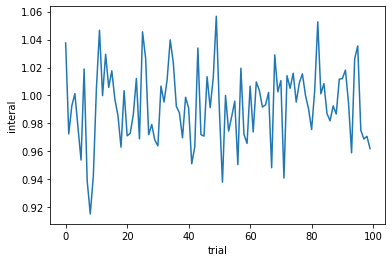

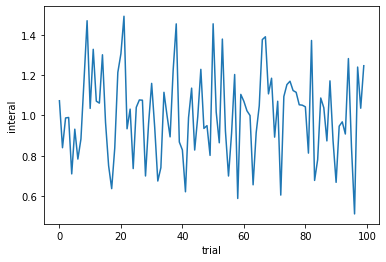

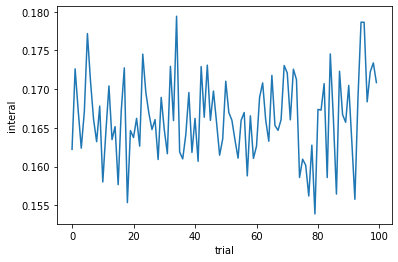

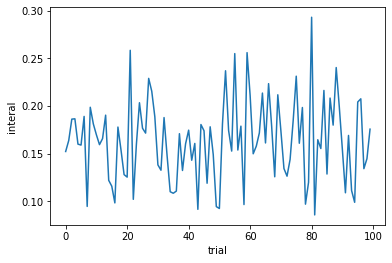

In [200]:
stddev(1000, f1, plot=True, plotname="3x2_1000trials.png")
stddev(20, f1, plot=True, plotname="3x2_20trials.png")
stddev(1000, f2, plot=True, plotname="x2y_1000trials.png")
stddev(20, f2, plot=True, plotname="x2y_20trials.png")

In [201]:
def stddev_vs_rootn(f, plotname="default.png"):
    X = []
    sqrts = []
    Y = []
    for num_points in range(10, 500):
        #X.append(num_points)
        X.append(1/math.sqrt(num_points))
        Y.append(stddev(num_points, f))
    #plt.plot(X,sqrts)
    plt.figure()
    plt.ylabel("Standard deviation")
    plt.xlabel("1/sqrt(N)")
    plt.plot(X, Y)
    plt.savefig(plotname)

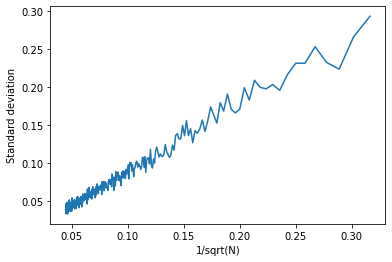

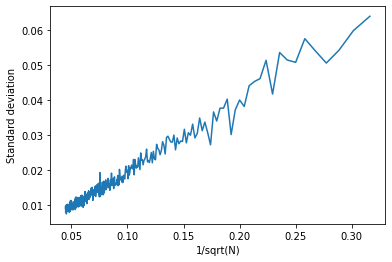

In [202]:
stddev_vs_rootn(f1, plotname="3x2_std_vs_rootn.png")
stddev_vs_rootn(f2, plotname="x2y_std_vs_rootn.png")